# Question 1

In [1]:
import numpy as np
import pandas as pd
import scipy
from numpy.linalg import svd
import matplotlib.pyplot as plt

## Part 1

In [49]:
X = pd.read_csv("pca_dataset.txt", sep=" ", header=None)
X.columns = ['a', 'b']

In [50]:
X = X - X.mean(axis=0) # center

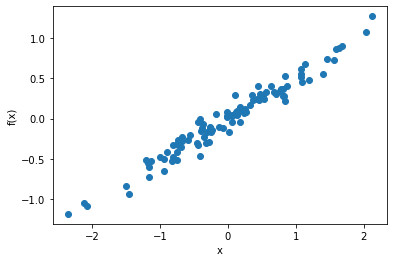

In [51]:
# plot data points
plt.scatter(X.a, X.b)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

In [52]:
U, S, Vt = svd(X, full_matrices=True) # calculate svd

In [53]:
U.shape

(100, 100)

In [54]:
S.shape

(2,)

In [55]:
Vt.shape

(2, 2)

In [56]:
X.shape

(100, 2)

In [57]:
Xb = X.dot(Vt.T) # U * S

In [58]:
Xb.columns = ['a', 'b'] # name columns for better processing the data

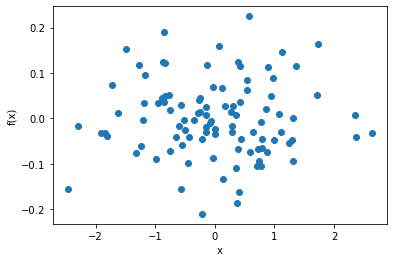

In [59]:
plt.scatter(Xb.a, Xb.b)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

In [60]:
trace = S.sum() # calculate trace
L_0 = (S[0]/trace).round(2)
L_1 = (S[1]/trace).round(2)
print("Percentage of first singular value: ", L_0)
print("Percentage of second singular value: ", L_1)

Percentage of first singular value:  0.92
Percentage of second singular value:  0.08


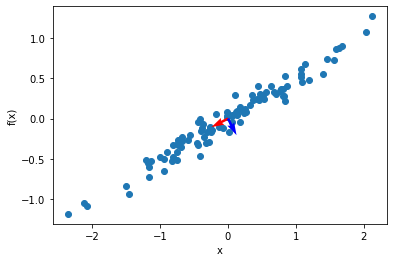

In [61]:
#showing principal components graphically
V = Vt.T
V1 = V[0]
V2 = V[1]
origin = [0, 0] # define origin
fig, ax = plt.subplots()
plt.scatter(X.a, X.b)
ax.set_ylabel('f(x)')
ax.set_xlabel('x')
ax.quiver(origin, origin, V1, V2, color=['r','b'], scale=4) # draw arrows
plt.show()

## Part 2

In [15]:
from skimage.transform import resize
from scipy import misc

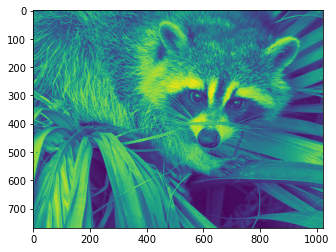

In [16]:
img = scipy.misc.face(gray=True)
plt.imshow(img)
plt.show()

In [17]:
img_resized = resize(img, (185, 249))

In [18]:
img_resized.shape

(185, 249)

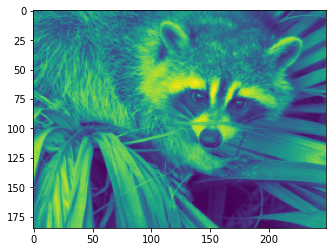

In [19]:
plt.imshow(img_resized) # image after resizing
plt.show()

In [20]:
df = pd.DataFrame(img_resized)
df = df - df.mean(axis=0) # centering
U, S, Vt = svd(df, full_matrices=True) # apply svd

In [21]:
Vt.shape

(249, 249)

In [22]:
U.shape

(185, 185)

In [23]:
S.shape

(185,)

In [24]:
""" 
S: singular value matrix
n: shape[0] of U
d: shape[0] of Vt
p: parameter for truncation
returns: truncated singular value matrix
truncate the svd. 
default for p is set to 249 to get all values"""
def trunca(S, n, d, p=249):
    Strunc = np.zeros((n, d)) # get zeros matrix 
    Strunc[:n, :n] = np.diag(S)
    Strunc[:, p:] = np.zeros([n, d-p])
    return Strunc

In [25]:
""" 
S: singular value matrix
U: left singular vector
Vt: right singular vector
p: parameter for truncation
plots the reconstructed image, print the energy value
"""
def reconstruct(p, S, U, Vt):
    n = U.shape[0]
    d = Vt.shape[0]
    sigma = trunca(S, n, d, p)
    Xr = U.dot(sigma).dot(Vt)
    trace = np.sum(S)
    energy = np.sum(sigma) / trace
    print("Energy: ", energy)
    mat = resize(Xr, (768, 1024))
    plt.imshow(mat)
    plt.show()

### L = all

Energy:  1.0


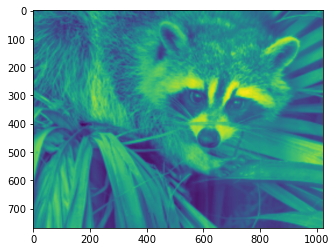

In [26]:
reconstruct(249, S, U, Vt)

### L = 120

Energy:  0.9482299612772851


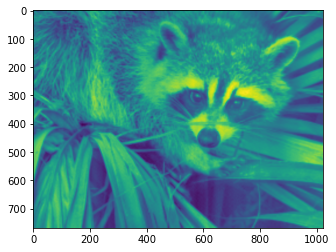

In [27]:
reconstruct(120, S, U, Vt)

### L = 50

Energy:  0.7587481362034851


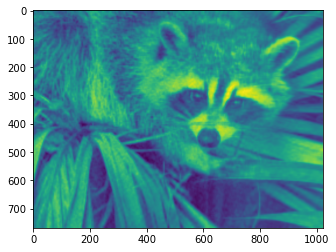

In [28]:
reconstruct(50, S, U, Vt)

### L = 10

Energy:  0.4023195092121395


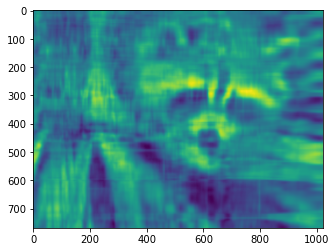

In [29]:
reconstruct(10, S, U, Vt)

#### By trial and error we have found L=161 as the limit of energy score 99%

Energy:  0.9901006441465531


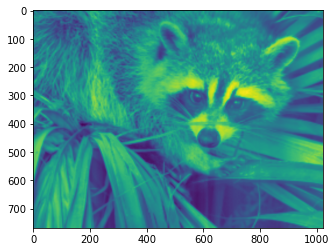

In [30]:
reconstruct(161, S, U, Vt)

## Part 3

In [31]:
vadere_data_X = pd.read_csv("data_DMAP_PCA_vadere.txt", sep=" ", header=None) #read data

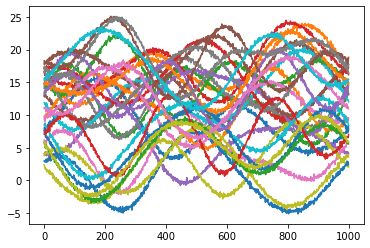

In [32]:
plt.plot(vadere_data_X)
plt.show()

In [33]:
vadere_data = vadere_data_X - vadere_data_X.mean() # center the data
vadere_data = vadere_data.to_numpy()

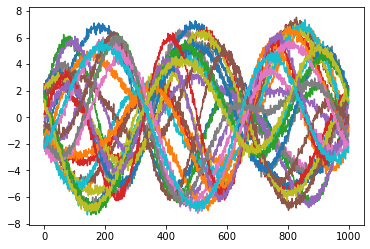

In [34]:
plt.plot(vadere_data)
plt.show()

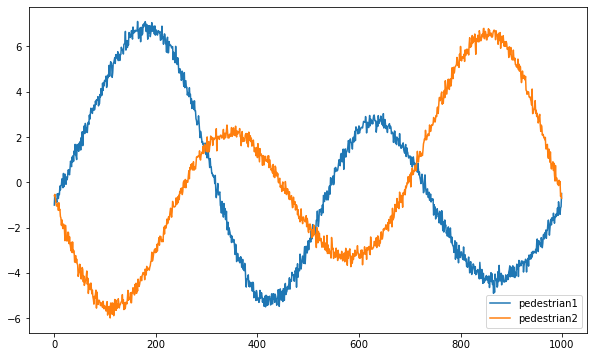

In [35]:
# plot trajectories of first 2 pedestrians
plt.figure(figsize=(10, 6))
plt.plot(vadere_data[:, 0])
plt.plot(vadere_data[:, 1])
plt.legend(['pedestrian1', 'pedestrian2'])
plt.show()

In [36]:
# function for calculating principal components and energy
# parameters: data and component number
def principal_components2(vadere_data, p):
    svd = np.linalg.svd(vadere_data, full_matrices=True)
    u = svd[0]
    s = svd[1]
    v = svd[2]

    s_rescaled = np.zeros([u.shape[1], v.shape[0]])
    for i in range(0,s.shape[0]):
        s_rescaled[i, i] = s[i]
    
    s_rescaled[:, p:] = np.zeros([s_rescaled.shape[0], v.shape[0]-p])
    result = np.dot(u, np.dot(s_rescaled, v))
    
    total_energy = np.sum(s)
    dim_energy = np.sum(s_rescaled)
    
    energy = dim_energy/total_energy
    
    return energy, result

In [37]:
components = 2

In [38]:
e, result = principal_components2(vadere_data, components)
print("Energy: ", e)

Energy:  0.6628250856150378


In [39]:
result.shape

(1000, 30)

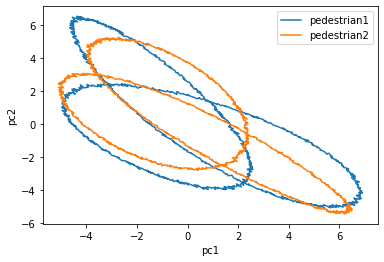

In [40]:
# plot trajectories of first 2 pedestrians w.r.t. 2 principal components
for i in range(0, 2):
    plt.plot(result[:,i], result[:,i+1])
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(['pedestrian1', 'pedestrian2'])
plt.show()

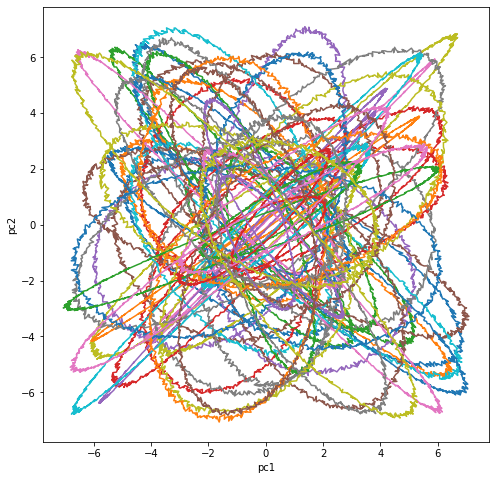

In [41]:
# plot trajectories of all pedestrians w.r.t. 2 principal components 
plt.figure(figsize=(8, 8))
for i in range(0, 29):
    plt.plot(result[:,i], result[:,i+1])
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

In [46]:
print("Dimension \t", "Energy")
for i in range(0, vadere_data.shape[1]):
    en, result_n = principal_components2(vadere_data, i)
    if en > 0.9:
        print(i, "\t\t", round(en,2))

Dimension 	 Energy
11 		 0.9
12 		 0.91
13 		 0.92
14 		 0.92
15 		 0.93
16 		 0.93
17 		 0.94
18 		 0.94
19 		 0.95
20 		 0.95
21 		 0.96
22 		 0.96
23 		 0.97
24 		 0.97
25 		 0.98
26 		 0.98
27 		 0.99
28 		 0.99
29 		 1.0
